In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import wave
import contextlib
import matplotlib
import os
from PIL import Image
from keras.applications.mobilenetv2 import MobileNetV2
from sklearn.decomposition import PCA
from keras.layers import Input, BatchNormalization, Conv2D, Dense, GlobalAveragePooling2D, Dropout, concatenate
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
rsltn = 196

/home/janardhan/anaconda3/envs/dl/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# plotting histograms for the durations, and claculating mean duration of all the files

In [100]:
durations = []
for i in os.listdir('data/'):
    fname = 'data/' + i
    print(i)
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        durations.append(duration)


ComParE2018_AtypicalAffect.txt


Error: file does not start with RIFF id

In [137]:
len(durations)

7341

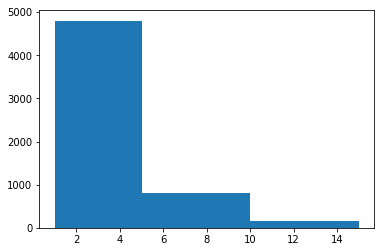

In [138]:
plt.hist(durations,bins=[1,5,10,15])
plt.show()

In [139]:
durations = np.array(durations)
np.mean(durations)

2.904104021931617

In [2]:
#generating spectograms and saving into '.npy' files

In [144]:

for i in os.listdir('data/'):
    fname = 'data/' + i
    y, sr = librosa.load(fname)
    x = librosa.effects.trim(x)[0]
    res = librosa.feature.melspectrogram(y=y, sr=sr)
    temp_res = librosa.power_to_db(res, ref=np.max)
    np.save('spectograms/'+i[:-4],temp_res)
    

train_0825.wav
test_0270.wav
train_0765.wav
devel_0550.wav
devel_1396.wav
train_0251.wav
train_0356.wav
test_0657.wav
devel_2116.wav
train_1068.wav
test_0947.wav
devel_1589.wav
devel_0645.wav
train_0706.wav
devel_1908.wav
devel_2784.wav
devel_0012.wav
train_3289.wav
devel_0379.wav
train_2472.wav
devel_2900.wav
test_0231.wav
devel_2936.wav
train_0926.wav
train_1263.wav
devel_1355.wav
devel_1063.wav
devel_0363.wav
train_0732.wav
train_3213.wav
devel_0169.wav
train_2240.wav
devel_1623.wav
devel_1407.wav
train_0091.wav
train_1210.wav
devel_2581.wav
train_2303.wav
train_2700.wav
train_1103.wav
train_1292.wav
train_1934.wav
train_1163.wav
train_0691.wav
devel_1555.wav
train_1318.wav
train_2739.wav
test_0786.wav
train_0908.wav
train_1740.wav
test_0263.wav
train_2498.wav
train_0841.wav
train_2743.wav
test_0261.wav
test_0184.wav
train_0178.wav
devel_2115.wav
devel_2772.wav
devel_0004.wav
devel_1479.wav
train_1289.wav
train_0531.wav
train_1484.wav
devel_0031.wav
train_2712.wav
devel_1807.wav
dev

train_0811.wav
devel_1963.wav
train_0463.wav
train_0387.wav
devel_0986.wav
train_2760.wav
train_2320.wav
devel_1875.wav
test_0082.wav
train_0101.wav
train_2601.wav
test_0863.wav
test_0092.wav
train_1627.wav
devel_2983.wav
test_0734.wav
test_0355.wav
train_2679.wav
train_2952.wav
train_1811.wav
devel_1547.wav
train_1084.wav
devel_1608.wav
train_2298.wav
train_3007.wav
devel_0403.wav
devel_2623.wav
test_0243.wav
devel_0092.wav
devel_1961.wav
train_1926.wav
train_3127.wav
train_1020.wav
devel_0858.wav
train_0817.wav
devel_2186.wav
train_2558.wav
test_0873.wav
devel_0572.wav
train_2257.wav
train_2545.wav
devel_0697.wav
train_0730.wav
devel_0246.wav
train_1091.wav
devel_0343.wav
devel_2509.wav
test_0057.wav
train_2065.wav
devel_0109.wav
test_0424.wav
train_2453.wav
train_2506.wav
test_0764.wav
devel_2521.wav
train_1965.wav
train_0001.wav
train_2263.wav
devel_2570.wav
train_3164.wav
devel_0383.wav
test_0026.wav
train_1146.wav
devel_2729.wav
devel_0804.wav
devel_2465.wav
test_0626.wav
train_2

devel_1868.wav
devel_2175.wav
train_1359.wav
train_0282.wav
train_1226.wav
devel_0619.wav
devel_1167.wav
test_0628.wav
test_0915.wav
train_2113.wav
train_0219.wav
devel_1728.wav
devel_2400.wav
train_0813.wav
devel_2748.wav
test_0149.wav
train_1016.wav
devel_1137.wav
train_1641.wav
train_2105.wav
devel_0637.wav
devel_2595.wav
train_0137.wav
devel_1564.wav
devel_0032.wav
train_3197.wav
train_2898.wav
devel_0419.wav
train_1547.wav
test_0983.wav
train_0497.wav
test_0757.wav
train_1295.wav
devel_2700.wav
devel_1695.wav
train_2491.wav
test_0642.wav
devel_2416.wav
train_2930.wav
devel_1297.wav
test_0496.wav
test_0537.wav
train_1200.wav
devel_1180.wav
train_2687.wav
train_0242.wav
devel_1794.wav
devel_1614.wav
devel_1188.wav
devel_0263.wav
devel_0252.wav
devel_0976.wav
devel_2273.wav
test_0097.wav
devel_1540.wav
train_0150.wav
devel_0325.wav
devel_0442.wav
devel_0660.wav
train_2618.wav
train_3147.wav
test_0396.wav
train_1261.wav
train_0570.wav
train_1878.wav
train_1230.wav
devel_0008.wav
devel

test_0740.wav
devel_0900.wav
devel_2635.wav
train_0309.wav
test_0277.wav
test_0984.wav
devel_0199.wav
test_0761.wav
train_2888.wav
train_1910.wav
train_0554.wav
train_0549.wav
devel_2168.wav
devel_2695.wav
devel_1741.wav
train_0944.wav
train_0797.wav
devel_0206.wav
train_3031.wav
train_0079.wav
train_1407.wav
train_2168.wav
train_2507.wav
devel_2765.wav
devel_2758.wav
train_0097.wav
devel_0949.wav
devel_2732.wav
test_0273.wav
train_1838.wav
devel_1912.wav
test_0493.wav
train_0720.wav
train_0826.wav
train_1553.wav
train_2409.wav
train_0217.wav
test_0629.wav
train_0265.wav
train_3097.wav
devel_0406.wav
train_1206.wav
test_0563.wav
test_0233.wav
train_0546.wav
train_2192.wav
train_2876.wav
devel_1319.wav
devel_1064.wav
train_2438.wav
devel_2109.wav
devel_0831.wav
train_2724.wav
train_1131.wav
train_2673.wav
test_0211.wav
devel_2677.wav
test_0354.wav
devel_0471.wav
test_0619.wav
devel_0330.wav
train_0416.wav
devel_0120.wav
devel_1382.wav
test_0383.wav
train_1669.wav
train_3149.wav
train_30

train_2977.wav
test_0323.wav
devel_2148.wav
devel_1048.wav
train_0565.wav
train_3060.wav
train_1269.wav
train_1721.wav
train_0814.wav
train_2281.wav
devel_1036.wav
devel_2476.wav
train_2697.wav
train_1144.wav
test_0877.wav
train_3026.wav
devel_1332.wav
devel_2327.wav
train_2439.wav
test_0158.wav
devel_1829.wav
test_0099.wav
train_2316.wav
devel_1524.wav
devel_1649.wav
train_0851.wav
train_2392.wav
train_2289.wav
devel_2960.wav
train_0333.wav
devel_2812.wav
train_2011.wav
train_0530.wav
train_2972.wav
devel_2763.wav
devel_1147.wav
devel_0391.wav
train_1676.wav
devel_2816.wav
devel_1950.wav
test_0194.wav
train_2839.wav
train_0070.wav
train_3208.wav
devel_0381.wav
train_2676.wav
devel_1900.wav
devel_2318.wav
train_1440.wav
train_0074.wav
train_3076.wav
train_3172.wav
train_0591.wav
test_0541.wav
train_0444.wav
train_0454.wav
train_3142.wav
train_0545.wav
devel_2218.wav
train_0900.wav
test_0686.wav
train_0402.wav
devel_2984.wav
train_0362.wav
devel_2456.wav
devel_2495.wav
devel_0082.wav
tr

devel_2795.wav
devel_2156.wav
devel_2458.wav
devel_2564.wav
devel_0540.wav
train_1082.wav
devel_2312.wav
train_2136.wav
train_1204.wav
devel_0519.wav
test_0739.wav
devel_1969.wav
test_0308.wav
test_0909.wav
train_2396.wav
test_0830.wav
devel_0515.wav
train_0141.wav
test_0429.wav
test_0219.wav
devel_2276.wav
train_1047.wav
train_3079.wav
test_0959.wav
devel_0750.wav
devel_1765.wav
devel_2688.wav
train_0275.wav
train_1679.wav
train_0669.wav
devel_1869.wav
devel_2328.wav
devel_2204.wav
train_0854.wav
train_2859.wav
test_0218.wav
devel_2189.wav
train_3275.wav
train_3155.wav
devel_2922.wav
devel_2904.wav
test_0547.wav
train_1604.wav
test_0719.wav
train_2047.wav
devel_1989.wav
train_1125.wav
devel_0291.wav
devel_0512.wav
test_0589.wav
train_1397.wav
train_0540.wav
devel_0684.wav
train_2553.wav
train_3240.wav
train_0509.wav
devel_2563.wav
test_0307.wav
train_1757.wav
devel_0300.wav
train_2112.wav
train_0992.wav
devel_2477.wav
train_1218.wav
devel_1566.wav
test_0780.wav
devel_0422.wav
devel_00

devel_0492.wav
devel_1919.wav
train_3190.wav
train_2890.wav
devel_1640.wav
devel_1111.wav
devel_2078.wav
train_3321.wav
test_0836.wav
train_2669.wav
devel_2032.wav
devel_1091.wav
test_0394.wav
train_0506.wav
train_3088.wav
test_0805.wav
devel_0616.wav
devel_1385.wav
train_0477.wav
devel_0758.wav
devel_2284.wav
devel_0133.wav
devel_0795.wav
train_1371.wav
train_3144.wav
devel_0355.wav
train_2485.wav
train_0665.wav
devel_2801.wav
test_0658.wav
test_0728.wav
devel_0584.wav
devel_2421.wav
train_0956.wav
train_0879.wav
devel_0871.wav
test_0650.wav
test_0931.wav
devel_2513.wav
test_0803.wav
devel_1179.wav
devel_0114.wav
devel_0921.wav
devel_0308.wav
train_0135.wav
train_0660.wav
devel_2295.wav
train_1890.wav
test_0771.wav
devel_2854.wav
devel_0190.wav
train_3291.wav
devel_0574.wav
train_1451.wav
train_0269.wav
devel_0652.wav
train_0682.wav
train_1753.wav
train_1220.wav
train_3188.wav
test_0486.wav
devel_2698.wav
devel_0055.wav
test_0604.wav
test_0303.wav
devel_2305.wav
devel_2982.wav
devel_2

train_3299.wav
devel_2582.wav
devel_0791.wav
train_2067.wav
train_0552.wav
test_0102.wav
devel_0984.wav
test_0058.wav
devel_1532.wav
train_1782.wav
devel_0075.wav
devel_2239.wav
train_0310.wav
train_1094.wav
train_3042.wav
train_1459.wav
test_0274.wav
train_1526.wav
train_1498.wav
devel_1019.wav
devel_1255.wav
devel_2943.wav
train_2639.wav
test_0832.wav
test_0957.wav
devel_0228.wav
train_1280.wav
train_0981.wav
devel_1027.wav
devel_1668.wav
test_0457.wav
train_2882.wav
devel_1877.wav
test_0838.wav
train_1695.wav
test_0434.wav
train_2336.wav
train_0617.wav
devel_2775.wav
train_2686.wav
test_0742.wav
devel_2245.wav
train_2998.wav
train_2279.wav
devel_1629.wav
devel_1477.wav
train_1960.wav
devel_2443.wav
devel_1571.wav
train_1024.wav
train_0226.wav
train_1348.wav
devel_0779.wav
train_1354.wav
train_2617.wav
devel_2834.wav
test_0613.wav
devel_2125.wav
test_0295.wav
train_0863.wav
train_0007.wav
train_3339.wav
train_0192.wav
train_1463.wav
devel_3000.wav
devel_1059.wav
devel_1300.wav
test_0

train_0188.wav
train_2862.wav
devel_1377.wav
test_0713.wav
devel_2163.wav
devel_2832.wav
devel_2249.wav
test_0851.wav
devel_0500.wav
train_1939.wav
train_1387.wav
train_1580.wav
train_2881.wav
train_0173.wav
devel_0480.wav
train_2913.wav
devel_1209.wav
devel_2931.wav
train_1154.wav
train_2195.wav
devel_0070.wav
test_0068.wav
test_0664.wav
train_0504.wav
devel_2362.wav
devel_0233.wav
train_2019.wav
test_0674.wav
train_2427.wav
train_0083.wav
train_2940.wav
train_3133.wav
train_1277.wav
devel_0961.wav
train_1542.wav
train_2110.wav
devel_1719.wav
test_0226.wav
train_1671.wav
devel_1181.wav
test_0235.wav
train_2421.wav
devel_2850.wav
train_2375.wav
devel_0219.wav
train_1511.wav
train_0959.wav
train_1252.wav
train_2591.wav
train_1798.wav
devel_0772.wav
train_1097.wav
devel_1856.wav
train_1843.wav
devel_1745.wav
train_0724.wav
test_0956.wav
devel_0756.wav
train_1871.wav
train_2242.wav
train_2606.wav
devel_2354.wav
train_2174.wav
devel_1462.wav
train_1213.wav
train_0512.wav
devel_0498.wav
dev

train_2725.wav
test_0014.wav
train_3010.wav
devel_2892.wav
train_0937.wav
devel_1972.wav
devel_1810.wav
train_1173.wav
devel_2844.wav
train_2405.wav
devel_0170.wav
devel_0065.wav
devel_2135.wav
test_0911.wav
devel_0289.wav
train_2267.wav
devel_1307.wav
devel_0826.wav
devel_0394.wav
devel_1689.wav
train_2949.wav
train_1424.wav
test_0327.wav
test_0418.wav
train_2945.wav
train_2203.wav
devel_2076.wav
train_2269.wav
train_1190.wav
devel_2526.wav
train_3320.wav
devel_2538.wav
train_1086.wav
test_0845.wav
test_0297.wav
train_3100.wav
devel_1897.wav
test_0888.wav
test_0004.wav
train_2167.wav
train_2824.wav
devel_0187.wav
train_0240.wav
test_0017.wav
devel_2660.wav
devel_0413.wav
devel_1341.wav
train_2814.wav
devel_0460.wav
train_1384.wav
train_2838.wav
train_1822.wav
train_3163.wav
devel_1560.wav
test_0159.wav
devel_1481.wav
train_2897.wav
train_0746.wav
devel_2711.wav
train_1401.wav
train_0882.wav
train_0440.wav
devel_0602.wav
devel_0265.wav
test_0797.wav
devel_0907.wav
train_0110.wav
train_

devel_0048.wav
devel_0192.wav
train_0637.wav
devel_1819.wav
train_2252.wav
devel_2539.wav
train_2661.wav
devel_1846.wav
devel_0732.wav
train_2699.wav
devel_1400.wav
train_0974.wav
devel_1545.wav
train_1847.wav
devel_0702.wav
devel_2942.wav
devel_1894.wav
devel_0397.wav
train_1356.wav
train_1221.wav
train_1010.wav
devel_1799.wav
devel_1913.wav
train_3329.wav
devel_0855.wav
test_0940.wav
test_0407.wav
test_0036.wav
train_0106.wav
train_3124.wav
devel_2990.wav
test_0514.wav
devel_2053.wav
devel_1022.wav
train_0614.wav
devel_1205.wav
train_1702.wav
devel_1879.wav
devel_1642.wav
test_0124.wav
train_0629.wav
train_1714.wav
train_0446.wav
devel_0297.wav
devel_0112.wav
test_0171.wav
train_1296.wav
devel_1862.wav
devel_1070.wav
devel_2841.wav
devel_0266.wav
test_0192.wav
train_1665.wav
devel_0846.wav
devel_0287.wav
train_1607.wav
devel_2411.wav
train_0305.wav
train_3117.wav
train_1098.wav
test_0136.wav
devel_1915.wav
devel_1133.wav
devel_1754.wav
test_0054.wav
test_0387.wav
train_2861.wav
devel

devel_2355.wav
train_2709.wav
devel_1049.wav
devel_1580.wav
devel_0781.wav
train_0244.wav
test_0086.wav
train_0012.wav
devel_0939.wav
devel_0021.wav
devel_2025.wav
devel_2692.wav
devel_2020.wav
devel_0014.wav
devel_2598.wav
train_2951.wav
train_2902.wav
train_2775.wav
devel_1905.wav
test_0553.wav
train_1299.wav
devel_0889.wav
devel_2631.wav
train_2997.wav
devel_2847.wav
train_2522.wav
test_0902.wav
devel_1680.wav
devel_0223.wav
devel_1317.wav
devel_0747.wav
train_0350.wav
train_0153.wav
devel_2290.wav
train_1174.wav
train_3161.wav
devel_2041.wav
devel_2867.wav
devel_2050.wav
devel_2531.wav
train_2220.wav
devel_1343.wav
test_0699.wav
train_1143.wav
train_2574.wav
train_0950.wav
train_1161.wav
devel_2542.wav
test_0853.wav
devel_1988.wav
train_2432.wav
train_2308.wav
train_0389.wav
train_0759.wav
train_2647.wav
devel_2653.wav
devel_1672.wav
train_0628.wav
test_0532.wav
devel_2036.wav
train_1059.wav
train_1445.wav
train_1360.wav
devel_1542.wav
devel_2336.wav
train_1823.wav
devel_1768.wav
d

devel_1803.wav
train_0694.wav
devel_1981.wav
devel_1577.wav
train_0492.wav
train_3053.wav
test_0758.wav
devel_1152.wav
train_2786.wav
devel_2114.wav
devel_2042.wav
train_0026.wav
train_1829.wav
devel_1391.wav
train_0597.wav
devel_1067.wav
test_0302.wav
test_0722.wav
train_1195.wav
devel_1412.wav
devel_1834.wav
test_0069.wav
train_0060.wav
train_1052.wav
train_1742.wav
devel_0614.wav
devel_0431.wav
train_0517.wav
devel_2144.wav
train_2254.wav
devel_2369.wav
test_0768.wav
devel_2948.wav
test_0737.wav
train_2380.wav
train_2499.wav
test_0427.wav
train_1543.wav
train_0643.wav
test_0147.wav
train_1983.wav
train_3062.wav
devel_1693.wav
train_3204.wav
train_0556.wav
train_0472.wav
devel_0121.wav
devel_1143.wav
train_0748.wav
devel_2742.wav
devel_2360.wav
devel_1946.wav
test_0375.wav
train_0080.wav
test_0335.wav
test_0672.wav
devel_1292.wav
test_0265.wav
devel_0836.wav
devel_1491.wav
devel_2648.wav
train_2774.wav
train_1718.wav
devel_0063.wav
train_1694.wav
devel_1805.wav
devel_0817.wav
test_08

train_0246.wav
train_1400.wav
train_0069.wav
devel_0130.wav
train_1725.wav
train_0500.wav
train_2434.wav
devel_1384.wav
train_2200.wav
devel_2155.wav
train_1265.wav
train_1513.wav
train_2636.wav
devel_2277.wav
devel_0733.wav
test_0290.wav
train_0805.wav
train_3005.wav
train_2317.wav
train_2021.wav
train_0307.wav
devel_0153.wav
train_0697.wav
train_1860.wav
train_1429.wav
devel_0730.wav
devel_1742.wav
devel_1467.wav
train_2080.wav
train_0068.wav
devel_1609.wav
devel_0247.wav
devel_0445.wav
test_0763.wav
test_0239.wav
devel_0963.wav
test_0904.wav
train_1786.wav
test_0502.wav
train_3199.wav
devel_2366.wav
train_1428.wav
test_0860.wav
train_2493.wav
devel_1489.wav
devel_1654.wav
devel_0235.wav
devel_0816.wav
test_0960.wav
devel_2901.wav
train_0241.wav
train_0061.wav
train_1821.wav
train_0470.wav
train_0311.wav
devel_2242.wav
train_0044.wav
train_1793.wav
train_2085.wav
devel_2777.wav
train_1895.wav
train_3234.wav
devel_0484.wav
train_0834.wav
devel_0370.wav
devel_2886.wav
test_0743.wav
tra

In [3]:
# generating spectograms and saving into '.npy' files without doing power_to_db

In [145]:

for i in os.listdir('data/'):
    fname = 'data/' + i
    y, sr = librosa.load(fname)
    res = librosa.feature.melspectrogram(y=y, sr=sr)
    np.save('spectograms_without_db/'+i[:-4],res)
    

train_0825.wav
test_0270.wav
train_0765.wav
devel_0550.wav
devel_1396.wav
train_0251.wav
train_0356.wav
test_0657.wav
devel_2116.wav
train_1068.wav
test_0947.wav
devel_1589.wav
devel_0645.wav
train_0706.wav
devel_1908.wav
devel_2784.wav
devel_0012.wav
train_3289.wav
devel_0379.wav
train_2472.wav
devel_2900.wav
test_0231.wav
devel_2936.wav
train_0926.wav
train_1263.wav
devel_1355.wav
devel_1063.wav
devel_0363.wav
train_0732.wav
train_3213.wav
devel_0169.wav
train_2240.wav
devel_1623.wav
devel_1407.wav
train_0091.wav
train_1210.wav
devel_2581.wav
train_2303.wav
train_2700.wav
train_1103.wav
train_1292.wav
train_1934.wav
train_1163.wav
train_0691.wav
devel_1555.wav
train_1318.wav
train_2739.wav
test_0786.wav
train_0908.wav
train_1740.wav
test_0263.wav
train_2498.wav
train_0841.wav
train_2743.wav
test_0261.wav
test_0184.wav
train_0178.wav
devel_2115.wav
devel_2772.wav
devel_0004.wav
devel_1479.wav
train_1289.wav
train_0531.wav
train_1484.wav
devel_0031.wav
train_2712.wav
devel_1807.wav
dev

devel_1963.wav
train_0463.wav
train_0387.wav
devel_0986.wav
train_2760.wav
train_2320.wav
devel_1875.wav
test_0082.wav
train_0101.wav
train_2601.wav
test_0863.wav
test_0092.wav
train_1627.wav
devel_2983.wav
test_0734.wav
test_0355.wav
train_2679.wav
train_2952.wav
train_1811.wav
devel_1547.wav
train_1084.wav
devel_1608.wav
train_2298.wav
train_3007.wav
devel_0403.wav
devel_2623.wav
test_0243.wav
devel_0092.wav
devel_1961.wav
train_1926.wav
train_3127.wav
train_1020.wav
devel_0858.wav
train_0817.wav
devel_2186.wav
train_2558.wav
test_0873.wav
devel_0572.wav
train_2257.wav
train_2545.wav
devel_0697.wav
train_0730.wav
devel_0246.wav
train_1091.wav
devel_0343.wav
devel_2509.wav
test_0057.wav
train_2065.wav
devel_0109.wav
test_0424.wav
train_2453.wav
train_2506.wav
test_0764.wav
devel_2521.wav
train_1965.wav
train_0001.wav
train_2263.wav
devel_2570.wav
train_3164.wav
devel_0383.wav
test_0026.wav
train_1146.wav
devel_2729.wav
devel_0804.wav
devel_2465.wav
test_0626.wav
train_2916.wav
devel_2

devel_1868.wav
devel_2175.wav
train_1359.wav
train_0282.wav
train_1226.wav
devel_0619.wav
devel_1167.wav
test_0628.wav
test_0915.wav
train_2113.wav
train_0219.wav
devel_1728.wav
devel_2400.wav
train_0813.wav
devel_2748.wav
test_0149.wav
train_1016.wav
devel_1137.wav
train_1641.wav
train_2105.wav
devel_0637.wav
devel_2595.wav
train_0137.wav
devel_1564.wav
devel_0032.wav
train_3197.wav
train_2898.wav
devel_0419.wav
train_1547.wav
test_0983.wav
train_0497.wav
test_0757.wav
train_1295.wav
devel_2700.wav
devel_1695.wav
train_2491.wav
test_0642.wav
devel_2416.wav
train_2930.wav
devel_1297.wav
test_0496.wav
test_0537.wav
train_1200.wav
devel_1180.wav
train_2687.wav
train_0242.wav
devel_1794.wav
devel_1614.wav
devel_1188.wav
devel_0263.wav
devel_0252.wav
devel_0976.wav
devel_2273.wav
test_0097.wav
devel_1540.wav
train_0150.wav
devel_0325.wav
devel_0442.wav
devel_0660.wav
train_2618.wav
train_3147.wav
test_0396.wav
train_1261.wav
train_0570.wav
train_1878.wav
train_1230.wav
devel_0008.wav
devel

train_2013.wav
test_0740.wav
devel_0900.wav
devel_2635.wav
train_0309.wav
test_0277.wav
test_0984.wav
devel_0199.wav
test_0761.wav
train_2888.wav
train_1910.wav
train_0554.wav
train_0549.wav
devel_2168.wav
devel_2695.wav
devel_1741.wav
train_0944.wav
train_0797.wav
devel_0206.wav
train_3031.wav
train_0079.wav
train_1407.wav
train_2168.wav
train_2507.wav
devel_2765.wav
devel_2758.wav
train_0097.wav
devel_0949.wav
devel_2732.wav
test_0273.wav
train_1838.wav
devel_1912.wav
test_0493.wav
train_0720.wav
train_0826.wav
train_1553.wav
train_2409.wav
train_0217.wav
test_0629.wav
train_0265.wav
train_3097.wav
devel_0406.wav
train_1206.wav
test_0563.wav
test_0233.wav
train_0546.wav
train_2192.wav
train_2876.wav
devel_1319.wav
devel_1064.wav
train_2438.wav
devel_2109.wav
devel_0831.wav
train_2724.wav
train_1131.wav
train_2673.wav
test_0211.wav
devel_2677.wav
test_0354.wav
devel_0471.wav
test_0619.wav
devel_0330.wav
train_0416.wav
devel_0120.wav
devel_1382.wav
test_0383.wav
train_1669.wav
train_31

train_2977.wav
test_0323.wav
devel_2148.wav
devel_1048.wav
train_0565.wav
train_3060.wav
train_1269.wav
train_1721.wav
train_0814.wav
train_2281.wav
devel_1036.wav
devel_2476.wav
train_2697.wav
train_1144.wav
test_0877.wav
train_3026.wav
devel_1332.wav
devel_2327.wav
train_2439.wav
test_0158.wav
devel_1829.wav
test_0099.wav
train_2316.wav
devel_1524.wav
devel_1649.wav
train_0851.wav
train_2392.wav
train_2289.wav
devel_2960.wav
train_0333.wav
devel_2812.wav
train_2011.wav
train_0530.wav
train_2972.wav
devel_2763.wav
devel_1147.wav
devel_0391.wav
train_1676.wav
devel_2816.wav
devel_1950.wav
test_0194.wav
train_2839.wav
train_0070.wav
train_3208.wav
devel_0381.wav
train_2676.wav
devel_1900.wav
devel_2318.wav
train_1440.wav
train_0074.wav
train_3076.wav
train_3172.wav
train_0591.wav
test_0541.wav
train_0444.wav
train_0454.wav
train_3142.wav
train_0545.wav
devel_2218.wav
train_0900.wav
test_0686.wav
train_0402.wav
devel_2984.wav
train_0362.wav
devel_2456.wav
devel_2495.wav
devel_0082.wav
tr

devel_2795.wav
devel_2156.wav
devel_2458.wav
devel_2564.wav
devel_0540.wav
train_1082.wav
devel_2312.wav
train_2136.wav
train_1204.wav
devel_0519.wav
test_0739.wav
devel_1969.wav
test_0308.wav
test_0909.wav
train_2396.wav
test_0830.wav
devel_0515.wav
train_0141.wav
test_0429.wav
test_0219.wav
devel_2276.wav
train_1047.wav
train_3079.wav
test_0959.wav
devel_0750.wav
devel_1765.wav
devel_2688.wav
train_0275.wav
train_1679.wav
train_0669.wav
devel_1869.wav
devel_2328.wav
devel_2204.wav
train_0854.wav
train_2859.wav
test_0218.wav
devel_2189.wav
train_3275.wav
train_3155.wav
devel_2922.wav
devel_2904.wav
test_0547.wav
train_1604.wav
test_0719.wav
train_2047.wav
devel_1989.wav
train_1125.wav
devel_0291.wav
devel_0512.wav
test_0589.wav
train_1397.wav
train_0540.wav
devel_0684.wav
train_2553.wav
train_3240.wav
train_0509.wav
devel_2563.wav
test_0307.wav
train_1757.wav
devel_0300.wav
train_2112.wav
train_0992.wav
devel_2477.wav
train_1218.wav
devel_1566.wav
test_0780.wav
devel_0422.wav
devel_00

devel_0492.wav
devel_1919.wav
train_3190.wav
train_2890.wav
devel_1640.wav
devel_1111.wav
devel_2078.wav
train_3321.wav
test_0836.wav
train_2669.wav
devel_2032.wav
devel_1091.wav
test_0394.wav
train_0506.wav
train_3088.wav
test_0805.wav
devel_0616.wav
devel_1385.wav
train_0477.wav
devel_0758.wav
devel_2284.wav
devel_0133.wav
devel_0795.wav
train_1371.wav
train_3144.wav
devel_0355.wav
train_2485.wav
train_0665.wav
devel_2801.wav
test_0658.wav
test_0728.wav
devel_0584.wav
devel_2421.wav
train_0956.wav
train_0879.wav
devel_0871.wav
test_0650.wav
test_0931.wav
devel_2513.wav
test_0803.wav
devel_1179.wav
devel_0114.wav
devel_0921.wav
devel_0308.wav
train_0135.wav
train_0660.wav
devel_2295.wav
train_1890.wav
test_0771.wav
devel_2854.wav
devel_0190.wav
train_3291.wav
devel_0574.wav
train_1451.wav
train_0269.wav
devel_0652.wav
train_0682.wav
train_1753.wav
train_1220.wav
train_3188.wav
test_0486.wav
devel_2698.wav
devel_0055.wav
test_0604.wav
test_0303.wav
devel_2305.wav
devel_2982.wav
devel_2

train_3299.wav
devel_2582.wav
devel_0791.wav
train_2067.wav
train_0552.wav
test_0102.wav
devel_0984.wav
test_0058.wav
devel_1532.wav
train_1782.wav
devel_0075.wav
devel_2239.wav
train_0310.wav
train_1094.wav
train_3042.wav
train_1459.wav
test_0274.wav
train_1526.wav
train_1498.wav
devel_1019.wav
devel_1255.wav
devel_2943.wav
train_2639.wav
test_0832.wav
test_0957.wav
devel_0228.wav
train_1280.wav
train_0981.wav
devel_1027.wav
devel_1668.wav
test_0457.wav
train_2882.wav
devel_1877.wav
test_0838.wav
train_1695.wav
test_0434.wav
train_2336.wav
train_0617.wav
devel_2775.wav
train_2686.wav
test_0742.wav
devel_2245.wav
train_2998.wav
train_2279.wav
devel_1629.wav
devel_1477.wav
train_1960.wav
devel_2443.wav
devel_1571.wav
train_1024.wav
train_0226.wav
train_1348.wav
devel_0779.wav
train_1354.wav
train_2617.wav
devel_2834.wav
test_0613.wav
devel_2125.wav
test_0295.wav
train_0863.wav
train_0007.wav
train_3339.wav
train_0192.wav
train_1463.wav
devel_3000.wav
devel_1059.wav
devel_1300.wav
test_0

train_2862.wav
devel_1377.wav
test_0713.wav
devel_2163.wav
devel_2832.wav
devel_2249.wav
test_0851.wav
devel_0500.wav
train_1939.wav
train_1387.wav
train_1580.wav
train_2881.wav
train_0173.wav
devel_0480.wav
train_2913.wav
devel_1209.wav
devel_2931.wav
train_1154.wav
train_2195.wav
devel_0070.wav
test_0068.wav
test_0664.wav
train_0504.wav
devel_2362.wav
devel_0233.wav
train_2019.wav
test_0674.wav
train_2427.wav
train_0083.wav
train_2940.wav
train_3133.wav
train_1277.wav
devel_0961.wav
train_1542.wav
train_2110.wav
devel_1719.wav
test_0226.wav
train_1671.wav
devel_1181.wav
test_0235.wav
train_2421.wav
devel_2850.wav
train_2375.wav
devel_0219.wav
train_1511.wav
train_0959.wav
train_1252.wav
train_2591.wav
train_1798.wav
devel_0772.wav
train_1097.wav
devel_1856.wav
train_1843.wav
devel_1745.wav
train_0724.wav
test_0956.wav
devel_0756.wav
train_1871.wav
train_2242.wav
train_2606.wav
devel_2354.wav
train_2174.wav
devel_1462.wav
train_1213.wav
train_0512.wav
devel_0498.wav
devel_0285.wav
dev

test_0014.wav
train_3010.wav
devel_2892.wav
train_0937.wav
devel_1972.wav
devel_1810.wav
train_1173.wav
devel_2844.wav
train_2405.wav
devel_0170.wav
devel_0065.wav
devel_2135.wav
test_0911.wav
devel_0289.wav
train_2267.wav
devel_1307.wav
devel_0826.wav
devel_0394.wav
devel_1689.wav
train_2949.wav
train_1424.wav
test_0327.wav
test_0418.wav
train_2945.wav
train_2203.wav
devel_2076.wav
train_2269.wav
train_1190.wav
devel_2526.wav
train_3320.wav
devel_2538.wav
train_1086.wav
test_0845.wav
test_0297.wav
train_3100.wav
devel_1897.wav
test_0888.wav
test_0004.wav
train_2167.wav
train_2824.wav
devel_0187.wav
train_0240.wav
test_0017.wav
devel_2660.wav
devel_0413.wav
devel_1341.wav
train_2814.wav
devel_0460.wav
train_1384.wav
train_2838.wav
train_1822.wav
train_3163.wav
devel_1560.wav
test_0159.wav
devel_1481.wav
train_2897.wav
train_0746.wav
devel_2711.wav
train_1401.wav
train_0882.wav
train_0440.wav
devel_0602.wav
devel_0265.wav
test_0797.wav
devel_0907.wav
train_0110.wav
train_0716.wav
train_

devel_0048.wav
devel_0192.wav
train_0637.wav
devel_1819.wav
train_2252.wav
devel_2539.wav
train_2661.wav
devel_1846.wav
devel_0732.wav
train_2699.wav
devel_1400.wav
train_0974.wav
devel_1545.wav
train_1847.wav
devel_0702.wav
devel_2942.wav
devel_1894.wav
devel_0397.wav
train_1356.wav
train_1221.wav
train_1010.wav
devel_1799.wav
devel_1913.wav
train_3329.wav
devel_0855.wav
test_0940.wav
test_0407.wav
test_0036.wav
train_0106.wav
train_3124.wav
devel_2990.wav
test_0514.wav
devel_2053.wav
devel_1022.wav
train_0614.wav
devel_1205.wav
train_1702.wav
devel_1879.wav
devel_1642.wav
test_0124.wav
train_0629.wav
train_1714.wav
train_0446.wav
devel_0297.wav
devel_0112.wav
test_0171.wav
train_1296.wav
devel_1862.wav
devel_1070.wav
devel_2841.wav
devel_0266.wav
test_0192.wav
train_1665.wav
devel_0846.wav
devel_0287.wav
train_1607.wav
devel_2411.wav
train_0305.wav
train_3117.wav
train_1098.wav
test_0136.wav
devel_1915.wav
devel_1133.wav
devel_1754.wav
test_0054.wav
test_0387.wav
train_2861.wav
devel

test_0209.wav
devel_2355.wav
train_2709.wav
devel_1049.wav
devel_1580.wav
devel_0781.wav
train_0244.wav
test_0086.wav
train_0012.wav
devel_0939.wav
devel_0021.wav
devel_2025.wav
devel_2692.wav
devel_2020.wav
devel_0014.wav
devel_2598.wav
train_2951.wav
train_2902.wav
train_2775.wav
devel_1905.wav
test_0553.wav
train_1299.wav
devel_0889.wav
devel_2631.wav
train_2997.wav
devel_2847.wav
train_2522.wav
test_0902.wav
devel_1680.wav
devel_0223.wav
devel_1317.wav
devel_0747.wav
train_0350.wav
train_0153.wav
devel_2290.wav
train_1174.wav
train_3161.wav
devel_2041.wav
devel_2867.wav
devel_2050.wav
devel_2531.wav
train_2220.wav
devel_1343.wav
test_0699.wav
train_1143.wav
train_2574.wav
train_0950.wav
train_1161.wav
devel_2542.wav
test_0853.wav
devel_1988.wav
train_2432.wav
train_2308.wav
train_0389.wav
train_0759.wav
train_2647.wav
devel_2653.wav
devel_1672.wav
train_0628.wav
test_0532.wav
devel_2036.wav
train_1059.wav
train_1445.wav
train_1360.wav
devel_1542.wav
devel_2336.wav
train_1823.wav
de

devel_1293.wav
devel_1803.wav
train_0694.wav
devel_1981.wav
devel_1577.wav
train_0492.wav
train_3053.wav
test_0758.wav
devel_1152.wav
train_2786.wav
devel_2114.wav
devel_2042.wav
train_0026.wav
train_1829.wav
devel_1391.wav
train_0597.wav
devel_1067.wav
test_0302.wav
test_0722.wav
train_1195.wav
devel_1412.wav
devel_1834.wav
test_0069.wav
train_0060.wav
train_1052.wav
train_1742.wav
devel_0614.wav
devel_0431.wav
train_0517.wav
devel_2144.wav
train_2254.wav
devel_2369.wav
test_0768.wav
devel_2948.wav
test_0737.wav
train_2380.wav
train_2499.wav
test_0427.wav
train_1543.wav
train_0643.wav
test_0147.wav
train_1983.wav
train_3062.wav
devel_1693.wav
train_3204.wav
train_0556.wav
train_0472.wav
devel_0121.wav
devel_1143.wav
train_0748.wav
devel_2742.wav
devel_2360.wav
devel_1946.wav
test_0375.wav
train_0080.wav
test_0335.wav
test_0672.wav
devel_1292.wav
test_0265.wav
devel_0836.wav
devel_1491.wav
devel_2648.wav
train_2774.wav
train_1718.wav
devel_0063.wav
train_1694.wav
devel_1805.wav
devel_0

train_0246.wav
train_1400.wav
train_0069.wav
devel_0130.wav
train_1725.wav
train_0500.wav
train_2434.wav
devel_1384.wav
train_2200.wav
devel_2155.wav
train_1265.wav
train_1513.wav
train_2636.wav
devel_2277.wav
devel_0733.wav
test_0290.wav
train_0805.wav
train_3005.wav
train_2317.wav
train_2021.wav
train_0307.wav
devel_0153.wav
train_0697.wav
train_1860.wav
train_1429.wav
devel_0730.wav
devel_1742.wav
devel_1467.wav
train_2080.wav
train_0068.wav
devel_1609.wav
devel_0247.wav
devel_0445.wav
test_0763.wav
test_0239.wav
devel_0963.wav
test_0904.wav
train_1786.wav
test_0502.wav
train_3199.wav
devel_2366.wav
train_1428.wav
test_0860.wav
train_2493.wav
devel_1489.wav
devel_1654.wav
devel_0235.wav
devel_0816.wav
test_0960.wav
devel_2901.wav
train_0241.wav
train_0061.wav
train_1821.wav
train_0470.wav
train_0311.wav
devel_2242.wav
train_0044.wav
train_1793.wav
train_2085.wav
devel_2777.wav
train_1895.wav
train_3234.wav
devel_0484.wav
train_0834.wav
devel_0370.wav
devel_2886.wav
test_0743.wav
tra

In [4]:
# loading the spectograms and calculating second dimension's mean of all the files

In [102]:
temp_arr = []
for i in os.listdir('spectograms/'):
    fname = 'spectograms/' + i
    temp = np.load(fname)
    temp_arr.append(temp.shape[1])


KeyboardInterrupt: 

In [158]:
temp_arr = np.array(temp_arr)

In [159]:
np.mean(temp_arr)

125.57853153521319

In [160]:
temp_arr = []
for i in os.listdir('spectograms/'):
    fname = 'spectograms/' + i
    if(i[:5]=='train'):

        temp = np.load(fname)
        temp_arr.append(temp.shape[1])


In [161]:
temp_arr = np.array(temp_arr)
np.mean(temp_arr)

141.745960502693

In [4]:
#loading spectograms and resizing them into (rsltn,rsltn)

In [36]:
f = open('ComParE2018_AtypicalAffect.txt', 'r')
x = f.readlines()
f.close()
label_dict = {} #Dictionary mapping file names to the label
for line in x:
    y = line.split()
    key = y[0].replace('.wav', '')
    label_dict.update({key: y[1]})
                   

In [37]:
train_arr = []
valid_arr = []
test_arr = []
train_labels = []
test_labels = []
valid_labels = []
labels_map = {'sad':0, 'neutral':1, 'happy':2, 'angry':3}
for i in os.listdir('spectograms/'):
    fname = 'spectograms/' + i
    if(i[:5]=='train'):
        temp = np.load(fname)
        temp_image = Image.fromarray(temp)
        temp_image = temp_image.resize((rsltn, rsltn),Image.ANTIALIAS)
        train_arr.append(np.array(temp_image))
        train_labels.append(labels_map[label_dict[i.replace('.npy', '')]])
    
    elif(i[:5]=='devel'):
        temp = np.load(fname)
        temp_image = Image.fromarray(temp)
        temp_image = temp_image.resize((rsltn,rsltn),Image.ANTIALIAS)
        valid_arr.append(np.array(temp_image))
        valid_labels.append(labels_map[label_dict[i.replace('.npy', '')]])
    elif(i[:4]=='test'):
        temp = np.load(fname)
        temp_image = Image.fromarray(temp)
        temp_image = temp_image.resize((rsltn, rsltn),Image.ANTIALIAS)
        test_arr.append(np.array(temp_image))
        test_labels.append(labels_map[label_dict[i.replace('.npy', '')]])
train_arr = np.array(train_arr)
valid_arr = np.array(valid_arr)
test_arr = np.array(test_arr)

In [38]:
train_arr.shape, valid_arr.shape, test_arr.shape

((3342, 196, 196), (3000, 196, 196), (999, 196, 196))

In [39]:
train_arr = train_arr.reshape([3342, rsltn, rsltn, 1])
valid_arr = valid_arr.reshape([3000, rsltn, rsltn, 1])
test_arr = test_arr.reshape([999, rsltn, rsltn, 1])

In [40]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

In [47]:
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)

In [41]:
def minmax_norm(data):
    for i in range(data.shape[0]):
        min_val = np.amin(data[i, :])
        max_val = np.amax(data[i, :])
        data[i, :] = (data[i, :]-min_val)/(max_val-min_val)
    return data

In [42]:
train_arr = minmax_norm(train_arr)
valid_arr = minmax_norm(valid_arr)
test_arr  = minmax_norm(test_arr)

In [63]:
from sklearn.utils import shuffle
train_data, train_labels = shuffle(train_data, train_labels)

In [9]:
# CNN architecture 1

In [43]:
train_data_0   = []
train_labels_0 = []
test_data_0    = []
test_labels_0  = []
valid_data_0   = []
valid_labels_0 = []

#############################################
train_data_1   = []
train_labels_1 = []
test_data_1    = []
test_labels_1  = []
valid_data_1   = []
valid_labels_1 = []

#################################

train_data_2   = []
train_labels_2 = []
test_data_2    = []
test_labels_2  = []
valid_data_2   = []
valid_labels_2 = []

###############################
train_data_3   = []
train_labels_3 = []
test_data_3    = []
test_labels_3  = []
valid_data_3   = []
valid_labels_3 = []
############################
for i,j in zip(train_arr, train_labels):
    if(j==0):
        train_data_0.append(i)
        train_labels_0.append(j)
    elif (j==1):
        train_data_1.append(i)
        train_labels_1.append(0)
    elif (j==2):
        train_data_2.append(i)
        train_labels_2.append(1)
    else:
        train_data_3.append(i)
        train_labels_3.append(1)

for i,j in zip(test_arr, test_labels):
    if(j==0):
        test_data_0.append(i)
        test_labels_0.append(j)
    elif (j==1):
        test_data_1.append(i)
        test_labels_1.append(0)
    elif (j==2):
        test_data_2.append(i)
        test_labels_2.append(1)
    else:
        test_data_3.append(i)
        test_labels_3.append(1)

for i,j in zip(valid_arr, valid_labels):
    if(j==0):
        valid_data_0.append(i)
        valid_labels_0.append(j)
    elif (j==1):
        valid_data_1.append(i)
        valid_labels_1.append(0)
    elif (j==2):
        valid_data_2.append(i)
        valid_labels_2.append(1)
    else:
        valid_data_3.append(i)
        valid_labels_3.append(1)

In [44]:
train_data = train_data_0 + train_data_3
train_labels = train_labels_0 + train_labels_3

valid_data = valid_data_0 + valid_data_3
valid_labels = valid_labels_0 + valid_labels_3

test_data = test_data_0 + test_data_3
test_labels = test_labels_0 + test_labels_3

In [45]:
train_data = np.array(train_data)
valid_data = np.array(valid_data)
test_data = np.array(test_data)

In [46]:
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(rsltn, rsltn, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 194, 194, 3)       30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       147712    
__________

In [14]:
model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_arr, train_labels, epochs=10, validation_data=(valid_arr, valid_labels), batch_size=20, )

Train on 3342 samples, validate on 3000 samples
Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[102400,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/mul_42 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/sub_14, training/Adam/gradients/dense_1/MatMul_grad/MatMul_1)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [11]:
# CNN architecture-2

In [64]:
mn = MobileNetV2(include_top=False)
mn.layers.pop(0)
inp = Input(shape=(rsltn, None, 1))
x = BatchNormalization()(inp)
x = Conv2D(10, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(3, kernel_size=(1, 1), padding='same', activation='relu')(x)
mn_out = mn(x)
x = GlobalAveragePooling2D()(mn_out)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=[inp], outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/home/janardhan/anaconda3/envs/dl/lib/python3.5/site-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 196, None, 1)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 196, None, 1)      4         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 196, None, 10)     20        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 196, None, 3)      33        
_________________________________________________________________
mobilenetv2_1.00_224 (Model) multiple                  2257984   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
__________

In [66]:
model.fit(train_data, train_labels, epochs=10, validation_data=(valid_data, valid_labels), batch_size=16)

Train on 3030 samples, validate on 2733 samples
Epoch 1/10
3030/3030 [==============================] - 64s 21ms/step - loss: 0.7594 - acc: 0.6591 - val_loss: 0.5803 - val_acc: 0.7406
Epoch 2/10
3030/3030 [==============================] - 48s 16ms/step - loss: 0.5753 - acc: 0.7257 - val_loss: 0.5897 - val_acc: 0.7398
Epoch 3/10
3030/3030 [==============================] - 50s 16ms/step - loss: 0.5539 - acc: 0.7327 - val_loss: 0.5795 - val_acc: 0.7398
Epoch 4/10
3030/3030 [==============================] - 49s 16ms/step - loss: 0.5053 - acc: 0.7535 - val_loss: 0.6294 - val_acc: 0.7080
Epoch 5/10
3030/3030 [==============================] - 48s 16ms/step - loss: 0.4733 - acc: 0.7690 - val_loss: 0.5921 - val_acc: 0.7201
Epoch 6/10
3030/3030 [==============================] - 50s 16ms/step - loss: 0.4337 - acc: 0.7921 - val_loss: 0.6168 - val_acc: 0.6850
Epoch 7/10
3030/3030 [==============================] - 51s 17ms/step - loss: 0.4051 - acc: 0.8162 - val_loss: 0.6922 - val_acc: 0.5884


In [67]:
train_preds = model.predict(test_data)
temp = np.zeros((4))
for i in train_preds:
    temp[np.argmax(i)] = temp[np.argmax(i)] + 1
    
    

In [68]:
temp

array([866.,  42.,   0.,   0.])

In [69]:
model.evaluate(test_data,test_labels)

908/908 [==============================] - 3s 3ms/step


[0.9232633063971734, 0.7654185022026432]

In [33]:
train_preds = model.predict(train_arr)
valid_preds = model.predict(valid_arr)
test_preds = model.predict(test_arr)

In [34]:
train_preds = np.argmax(train_preds,axis=1)
valid_preds = np.argmax(valid_preds,axis=1)
test_preds = np.argmax(test_preds,axis=1)

In [35]:
train_labels.shape

(3342, 4)

In [36]:
recall_score(np.argmax(train_labels,axis=1),train_preds,average='macro'), recall_score( np.argmax(valid_labels,axis=1),valid_preds, average='macro')

(0.25407181794695394, 0.25105573735763226)

In [37]:
precision_score(np.argmax(train_labels,axis=1),train_preds,average='macro'), recall_score( np.argmax(valid_labels,axis=1),valid_preds, average='macro')

/home/janardhan/anaconda3/envs/dl/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.28019585394774504, 0.25105573735763226)

In [38]:
recall_score(np.argmax(test_labels,axis=1),test_preds,average='macro')

0.2504284847312717

In [39]:
precision_score(np.argmax(test_labels,axis=1),test_preds,average='macro')

/home/janardhan/anaconda3/envs/dl/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.23561557788944723

In [46]:
# training with class weights

In [47]:
class_weights = compute_class_weight('balanced',np.unique(np.argmax(train_labels,axis=1)),np.argmax(train_labels,axis=1))

In [59]:

class_weight_dict = {}
for i in range(4):
    class_weight_dict[i] = class_weights[i]

In [69]:
model.fit(train_arr, train_labels, epochs=30, validation_data=(valid_arr, valid_labels), batch_size=16, class_weight=class_weight_dict)

Train on 3342 samples, validate on 3000 samples
Epoch 1/30
3342/3342 [==============================] - 55s 16ms/step - loss: 0.8575 - acc: 0.4931 - val_loss: 1.2677 - val_acc: 0.3293
Epoch 2/30
3342/3342 [==============================] - 55s 16ms/step - loss: 0.7975 - acc: 0.5054 - val_loss: 1.8814 - val_acc: 0.1757
Epoch 3/30
3342/3342 [==============================] - 55s 16ms/step - loss: 0.7205 - acc: 0.5392 - val_loss: 1.4465 - val_acc: 0.3010
Epoch 4/30
3342/3342 [==============================] - 55s 16ms/step - loss: 0.6613 - acc: 0.5817 - val_loss: 1.2774 - val_acc: 0.3800
Epoch 5/30
3342/3342 [==============================] - 55s 17ms/step - loss: 0.6338 - acc: 0.6170 - val_loss: 1.0355 - val_acc: 0.5190
Epoch 6/30
3342/3342 [==============================] - 56s 17ms/step - loss: 0.5539 - acc: 0.6164 - val_loss: 1.1150 - val_acc: 0.5123
Epoch 7/30
3342/3342 [==============================] - 57s 17ms/step - loss: 0.5132 - acc: 0.6777 - val_loss: 1.1201 - val_acc: 0.5303


KeyboardInterrupt: 

In [100]:
train_preds = model.predict(train_arr)
valid_preds = model.predict(valid_arr)
test_preds = model.predict(test_arr)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[[[0.58554345],
         [0.58226115],
         [0.57845825],
         ...,
         [0.36189708],
         [0.3615443 ],
         [0.3612525 ]],

        [[0.58029187],
         [0.5772453 ],...

In [ ]:
train_preds = np.argmax(train_preds,axis=1)
valid_preds = np.argmax(valid_preds,axis=1)
test_preds = np.argmax(test_preds,axis=1)

In [ ]:
recall_score(np.argmax(train_labels,axis=1),train_preds,average='macro'), recall_score( np.argmax(valid_labels,axis=1),valid_preds, average='macro')

In [ ]:
precision_score(np.argmax(train_labels,axis=1),train_preds,average='macro'), recall_score( np.argmax(valid_labels,axis=1),valid_preds, average='macro')

In [101]:
recall_score(np.argmax(test_labels,axis=1),test_preds,average='macro')

0.2537937647059537

In [102]:
precision_score(np.argmax(test_labels,axis=1),test_preds,average='macro')

0.29619660364145656

In [ ]:
# loading features and performing pca

In [48]:
train2 = np.load('train2.npy')

valid2 = np.load('valid2.npy')

test2 = np.load('test2.npy')

valid_x = valid2[0]

train_x = train2[0]

test_x = test2[0]

new_train = []
for i in train_x:
    new_train.append(i)
new_train = np.array(new_train)

new_valid = []
for i in valid_x:
    new_valid.append(i)
new_valid = np.array(new_valid)

new_test = []
for i in test_x:
    new_test.append(i)
new_test = np.array(new_test)

pca = PCA(n_components=7)

pca.fit(new_train)

new_train_x = pca.transform(new_train)

new_valid_x = pca.transform(new_valid)

new_test_x = pca.transform(new_test)

new_train_y = train2[1]
new_valid_y = valid2[1]
new_test_y = test2[1]

In [49]:
train_data_0   = []
train_labels_0 = []
test_data_0    = []
test_labels_0  = []
valid_data_0   = []
valid_labels_0 = []

#############################################
train_data_1   = []
train_labels_1 = []
test_data_1    = []
test_labels_1  = []
valid_data_1   = []
valid_labels_1 = []

#################################

train_data_2   = []
train_labels_2 = []
test_data_2    = []
test_labels_2  = []
valid_data_2   = []
valid_labels_2 = []

###############################
train_data_3   = []
train_labels_3 = []
test_data_3    = []
test_labels_3  = []
valid_data_3   = []
valid_labels_3 = []
############################
for i,j in zip(new_train_x, new_train_y):
    if(j==0):
        train_data_0.append(i)
        train_labels_0.append(j)
    elif (j==1):
        train_data_1.append(i)
        train_labels_1.append(0)
    elif (j==2):
        train_data_2.append(i)
        train_labels_2.append(1)
    else:
        train_data_3.append(i)
        train_labels_3.append(1)

for i,j in zip(new_test_x, new_test_y):
    if(j==0):
        test_data_0.append(i)
        test_labels_0.append(j)
    elif (j==1):
        test_data_1.append(i)
        test_labels_1.append(0)
    elif (j==2):
        test_data_2.append(i)
        test_labels_2.append(1)
    else:
        test_data_3.append(i)
        test_labels_3.append(1)

for i,j in zip(new_valid_x, new_valid_y):
    if(j==0):
        valid_data_0.append(i)
        valid_labels_0.append(j)
    elif (j==1):
        valid_data_1.append(i)
        valid_labels_1.append(0)
    elif (j==2):
        valid_data_2.append(i)
        valid_labels_2.append(1)
    else:
        valid_data_3.append(i)
        valid_labels_3.append(1)

In [50]:
new_train_x = train_data_0 + train_data_3
new_train_y = train_labels_0 + train_labels_3

new_valid_x = valid_data_0 + valid_data_3
new_valid_y = valid_labels_0 + valid_labels_3

new_test_x = test_data_0 + test_data_3
new_test_y = test_labels_0 + test_labels_3

In [51]:
new_train_x = np.array(new_train_x)
new_valid_x = np.array(new_valid_x)
new_test_x = np.array(new_test_x)

In [52]:
new_train_y = np.array(new_train_y)
new_valid_y = np.array(new_valid_y)
new_test_y = np.array(new_test_y)

In [53]:
from sklearn.utils import shuffle
train_data,new_train_x, train_labels = shuffle(train_data, new_train_x, train_labels)

In [54]:
# CNN architecrure - 3, combining both spectogram, and pca features

In [63]:
mn = MobileNetV2(include_top=False)
mn.layers.pop(0)
inp = Input(shape=(rsltn, None, 1))
x = BatchNormalization()(inp)
x = Conv2D(10, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(3, kernel_size=(1, 1), padding='same', activation='relu')(x)
mn_out = mn(x)
x = GlobalAveragePooling2D()(mn_out)

inp2 = Input(shape=(7,), name='pca')
y = BatchNormalization()(inp2)

x = concatenate([x, y], axis=-1)
    
x = Dense(256, activation='relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=[inp,inp2], outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/home/janardhan/anaconda3/envs/dl/lib/python3.5/site-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [64]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 196, None, 1) 0                                            
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 196, None, 1) 4           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 196, None, 10 20          batch_normalization_9[0][0]      
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 196, None, 3) 33          conv2d_9[0][0]                   
__________________________________________________________________________________________________
mobilenetv

In [65]:
model.fit([train_data,new_train_x], train_labels, epochs=5, validation_data=([valid_data,new_valid_x], valid_labels), batch_size=16)

Train on 312 samples, validate on 267 samples
Epoch 1/5
312/312 [==============================] - 20s 63ms/step - loss: 0.8311 - acc: 0.5545 - val_loss: 0.4884 - val_acc: 0.7978
Epoch 2/5
312/312 [==============================] - 5s 16ms/step - loss: 0.7277 - acc: 0.6058 - val_loss: 0.4917 - val_acc: 0.8464
Epoch 3/5
312/312 [==============================] - 5s 16ms/step - loss: 0.6257 - acc: 0.6603 - val_loss: 0.4434 - val_acc: 0.8427
Epoch 4/5
312/312 [==============================] - 5s 16ms/step - loss: 0.4620 - acc: 0.7724 - val_loss: 0.4068 - val_acc: 0.8240
Epoch 5/5
312/312 [==============================] - 5s 16ms/step - loss: 0.4257 - acc: 0.8141 - val_loss: 0.3677 - val_acc: 0.8427


In [66]:
train_preds = model.predict([test_data,new_test_x])
temp = np.zeros((4))
for i in train_preds:
    temp[np.argmax(i)] = temp[np.argmax(i)] + 1 
temp

array([83.,  8.,  0.,  0.])

In [67]:
model.evaluate([test_data,new_test_x],test_labels)

91/91 [==============================] - 0s 3ms/step


[0.3502453218449603, 0.868131874026833]

In [71]:
for layer in model.layers:
    print(layer.name)

input_10
batch_normalization_11
conv2d_15
conv2d_16
mobilenetv2_1.00_224
pca
global_average_pooling2d_6
batch_normalization_12
concatenate_3
dense_14
dropout_6
dense_15
dropout_7
dense_16


In [73]:
for layer in model.layers:
    if(layer.name[:4]=='conv'):
        layer.trainable = False

In [74]:
for layer in model.layers:
    if(layer.name[:4]=='mobi'):
        layer.trainable = False

In [75]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 196, None, 1) 0                                            
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 196, None, 1) 4           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 196, None, 10 20          batch_normalization_11[0][0]     
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 196, None, 3) 33          conv2d_15[0][0]                  
__________________________________________________________________________________________________
mobilenetv

/home/janardhan/anaconda3/envs/dl/lib/python3.5/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
